<img src="https://i1.sndcdn.com/avatars-000274765548-vj7h0w-t500x500.jpg" style='float:right; width:200px; margin: 0 20px;'>

<img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-11-512.png" style='float:right; width:200px; margin: 0 20px;'>


# Twitter V CMV topological differences --> Twitter
---

> Create feature set for CMV and Twitter 

> Do comperative analysis of features

In [103]:
# env 
import sys
sys.path.append('/Users/shaimeital/code/thesis/conversant')
sys.path.append('/Users/shaimeital/code/thesis/cmv-stance-classification')

In [104]:
from conversant.conversation.examples.controversial_feature_extraction import *
from conversant.conversation.conversation_utils import conversation_to_dataframe
from conversant.conversation.parse import ConversationParser
from stance_classification.classifiers.maxcut_stance_classifier import MaxcutStanceClassifier

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import glob
import os
from tqdm import tqdm

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

## Load Raw Data

In [5]:
twitter_conversation_ids = [file for file in os.listdir('/Users/shaimeital/code/thesis/cmv-stance-classification/data/Twitter Conversation/rumers/full-conversations')]

In [ ]:
# one example
conv_id = "498235547685756928"
sample= pd.read_json(f'/Users/shaimeital/code/thesis/cmv-stance-classification/data/Twitter Conversation/rumers/full-conversations/{conv_id}/tweets.jsonl',
                     lines= True,
                     dtype={'in_reply_to_status_id_str':str, 'conversation_id_str': str, 'full_text':str, 'id_str':str})


In [11]:
twitter_conversations = []
error = 0
for id_ in tqdm(twitter_conversation_ids):
    try:
        current= pd.read_json(f'/Users/shaimeital/code/thesis/cmv-stance-classification/data/Twitter Conversation/rumers/full-conversations/{id_}/tweets.jsonl',
                         lines= True,
                         dtype={'in_reply_to_status_id_str':str, 'conversation_id_str': str, 'full_text':str, 'id_str':str})
        twitter_conversations.append(current)
    except:
        error+=1
        pass


 19%|█▉        | 1222/6425 [00:17<01:06, 77.76it/s]


 39%|███▊      | 2486/6425 [00:36<01:04, 61.01it/s]


 52%|█████▏    | 3341/6425 [00:57<01:06, 46.63it/s]


 70%|███████   | 4526/6425 [01:17<00:26, 72.47it/s]


 89%|████████▉ | 5749/6425 [01:36<00:10, 65.90it/s]


100%|██████████| 6425/6425 [01:46<00:00, 60.45it/s]


In [12]:
error

1

In [13]:
# df of all twitter conversations
convs = pd.concat([conv for conv in twitter_conversations])

In [14]:
convs.head()

,created_at,id_str,full_text,display_text_range,entities,source,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,user_id_str,...,place,possibly_sensitive,text,generated,card,is_quote_status,quoted_status_id_str,quoted_status_permalink,withheld_in_countries,supplemental_language
0,2014-08-15 21:44:46+00:00,500397711632236545,@ticinmymind @PresReed @senka Ditto!,"[0, 36]",{'user_mentions': [{'screen_name': 'ticinmymin...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",500364991556759552,2.7212e+09,ticinmymind,1408964976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-08-15 22:02:27+00:00,500402163966025729,@PresReed @AntonioFrench thank u jesus,"[0, 38]","{'user_mentions': [{'screen_name': 'PresReed',...","<a href=""http://twitter.com/#!/download/ipad"" ...",500363141034020865,2.71728e+07,PresReed,16515767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-08-15 22:01:20+00:00,500401882276585472,@PresReed @BreeSmithWx Good Job!,"[0, 32]","{'user_mentions': [{'screen_name': 'PresReed',...","<a href=""http://twitter.com/download/iphone"" r...",500363141034020865,2.71728e+07,PresReed,1639960820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-08-15 21:48:34+00:00,500398670358257664,"@PresReed @AntonioFrench fuck yeah, good for her!","[0, 49]","{'user_mentions': [{'screen_name': 'PresReed',...","<a href=""http://twitter.com/download/iphone"" r...",500363141034020865,2.71728e+07,PresReed,1656331460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-08-15 23:37:02+00:00,500425964778557440,@PresReed THANK YOU TO THE TWO LADIES YOU ARE ...,"[0, 138]","{'user_mentions': [{'screen_name': 'PresReed',...","<a href=""http://twitter.com/download/android"" ...",500363141034020865,2.71728e+07,PresReed,2298877380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
convs.columns

Index(['created_at', 'id_str', 'full_text', 'display_text_range', 'entities',
       'source', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user_id_str', 'retweet_count',
       'favorite_count', 'reply_count', 'quote_count', 'conversation_id_str',
       'lang', 'extended_entities', 'possibly_sensitive_editable', 'geo',
       'coordinates', 'place', 'possibly_sensitive', 'text', 'generated',
       'card', 'is_quote_status', 'quoted_status_id_str',
       'quoted_status_permalink', 'withheld_in_countries',
       'supplemental_language'],
      dtype='object')

## Transform to Conversation object and to feature set

In [18]:
class Twitterconversationreader(ConversationParser[pd.DataFrame, pd.Series]):

    def __init__(self):
        super().__init__()


    def extract_node_data(self, raw_node: pd.Series, verbose =0) -> NodeData:
        node_id = raw_node.id_str
        if verbose > 0:
            print(f'parsing node id {node_id}')
        author = raw_node.user_id_str
        timestamp = raw_node.created_at
        data = dict(raw_node)
        parent_id = data.get('in_reply_to_status_id_str')
        if parent_id == 'nan':
            parent_id = None
            print(f'root node is {node_id}')
            
        return NodeData(node_id, author, timestamp, data, parent_id)
        
    def iter_raw_nodes(self, raw_conversation: pd.DataFrame) -> Iterable[pd.Series]:
        for x in raw_conversation.iterrows():
            yield x[1]

In [19]:
twitter_reader = Twitterconversationreader()

In [24]:
conversations = []
error = 0
for conv_ in twitter_conversations:
    try:
        conversation = twitter_reader.parse(conv_)
        conversations.append(conversation)
    except:
        error += 1
        pass

root node is 500363141034020865
root node is 580320995266936832
root node is 524950899899113473
root node is 553529101659566080
root node is 553589970775343104
root node is 576316647880839168
root node is 544282393801007104
root node is 544572800799739904
root node is 552857628062547968
root node is 552832610645606401
root node is 544287499397242880
root node is 553661777486286848
root node is 553586510260629505
root node is 553587735613952001
root node is 553591848821092353
root node is 544489387112038400
root node is 544491358145490945
root node is 524960851493924864
root node is 552830668607348736
root node is 544512691948498944
root node is 580333827425439745
root node is 544310849784274945
root node is 552985339011153920
root node is 553225809444749313
root node is 500365187413999616
root node is 500370720653058049
root node is 499699803576881152
root node is 552837775498964992
root node is 544444148234076160
root node is 581245152158728192
root node is 544530690478723073
root nod

root node is 524929893759737856
root node is 524922557120909314
root node is 544521260840267776
root node is 552837086425128961
root node is 544377700677615616
root node is 524950584349454337
root node is 500289088285863936
root node is 500316624944377857
root node is 553200115079712768
root node is 498271954185379840
root node is 500404509592387585
root node is 552807101442322432
root node is 580329111064686592
root node is 552801958428700672
root node is 524954833648771072
root node is 498291267756130305
root node is 498309788732641282
root node is 544372222400671744
root node is 552800045096259584
root node is 525218145859280896
root node is 525223896841486336
root node is 544357221220753408
root node is 544355845489065984
root node is 545189566324690944
root node is 544495737770618880
root node is 552875001280344064
root node is 553115627771019265
root node is 580338165824667649
root node is 524948941956448257
root node is 553481335948709888
root node is 553540580912156672
root nod

root node is 544352945391669248
root node is 553591055833382913
root node is 544396608704901120
root node is 524979881525137409
root node is 522264428386205696
root node is 552818870281850881
root node is 553346875416649728
root node is 552786361758265344
root node is 553495922639122432
root node is 580342917291708416
root node is 580333881687195648
root node is 553339648916078592
root node is 553339876775829504
root node is 553567850301231106
root node is 553136237083889664
root node is 529726244834017280
root node is 553231516290269184
root node is 500162426998755330
root node is 553113395487330304
root node is 529674135098900481
root node is 552996335319007233
root node is 544366723067957249
root node is 544414622376132608
root node is 500411513727750148
root node is 544494787168972800
root node is 553473416905629696
root node is 500282606316158976
root node is 544511434840113152
root node is 544521125129367552
root node is 553554578617405441
root node is 553552293371871233
root nod

root node is 544290258951892992
root node is 553583867664535552
root node is 524968466559033345
root node is 553096978788515840
root node is 580882121222434816
root node is 580334199187644416
root node is 499411840733282304
root node is 553180997786025984
root node is 553151700950065152
root node is 544308888628387840
root node is 544515097625108480
root node is 500274132756738048
root node is 544450560460480512
root node is 553542235661553665
root node is 544269221564137472
root node is 553519997956669440
root node is 524940716733370374
root node is 499353410156908546
root node is 499349294034743297
root node is 524989654995849216
root node is 500377917273034752
root node is 500362679039840257
root node is 499608179362521088
root node is 553236511282704386
root node is 553229906633850882
root node is 525071638464049152
root node is 553139540412469248
root node is 553105460887572480
root node is 553477554041257985
root node is 500349581197316096
root node is 500340460238680064
root nod

root node is 524953569762766848
root node is 524957701345132544
root node is 535942066694803456
root node is 544511676088066048
root node is 580377378226049024
root node is 552831761957523456
root node is 498277674692149248
root node is 524961016904294400
root node is 552844311096983552
root node is 580336348764065793
root node is 524964279456653312
root node is 524982907052765184
root node is 524984772431720449
root node is 544464744791306241
root node is 544478078064263170
root node is 499366977497214976
root node is 524927288077746176
root node is 544319450569134081
root node is 544514127197388801
root node is 500360632093646848
root node is 524983366261936130
root node is 544481159716290560
root node is 544505343632748544
root node is 524982859036377089
root node is 524979391512989696
root node is 524947604690702336
root node is 553188214522249217
root node is 544491410439667713
root node is 498254540870017025
root node is 531850434584256512
root node is 553165824979386368
root nod

root node is 500350845134061569
root node is 500383878386044928
root node is 553224764924243969
root node is 499700279412281345
root node is 552831974784905216
root node is 553542208214036480
root node is 500320316602974210
root node is 553144384737525762
root node is 499345010190348288
root node is 499409692834021376
root node is 580326111311171584
root node is 525049639016615937
root node is 500341884678836224
root node is 553546878902861825
root node is 544400853298184194
root node is 580323456996282369
root node is 553472488462901248
root node is 500359897557790720
root node is 580320563891019776
root node is 553544694765215745
root node is 552803725857660928
root node is 552789443644751872
root node is 552847035108323329
root node is 500367408247627776
root node is 500360244187635712
root node is 580326398620934144
root node is 580659311212257281
root node is 553553202197827584
root node is 580327960638521344
root node is 544458427263512576
root node is 580330560331091968
root nod

root node is 500279660476112897
root node is 500242061279637504
root node is 553171527995117568
root node is 553575718786199552
root node is 500424326198611968
root node is 500422971320963072
root node is 553546967281061888
root node is 500385585807499266
root node is 529653029747064832
root node is 500363023958409216
root node is 525012561214058496
root node is 524941529928839168
root node is 553183420499894272
root node is 553600108634603520
root node is 553595046579429378
root node is 552842614555545600
root node is 544346361101963265
root node is 544347644131549185
root node is 544325896661114881
root node is 525019469983531008
root node is 525021915363037184
root node is 552791115599192064
root node is 553200726403710976
root node is 525018288330272768
root node is 529734565599121410
root node is 500073002101665792
root node is 524942952733220865
root node is 499657337548701696
root node is 576716016908136448
root node is 524973920722878464
root node is 525012738280792065
root nod

root node is 553476288103477249
root node is 544351969658564608
root node is 580329747416113152
root node is 552807054268956673
root node is 553572914923323392
root node is 544431304725381120
root node is 544400775775289344
root node is 552815387759616000
root node is 500300813835988992
root node is 525056307716706305
root node is 525037656820826112
root node is 529688713253494785
root node is 498322865843109888
root node is 544477097016578048
root node is 525017500061536258
root node is 525020108951781376
root node is 580331347752914944
root node is 553582206019723264
root node is 552814076167213056
root node is 498280730070622209
root node is 544492614838673408
root node is 553542417673367552
root node is 553653467840266241
root node is 553584782987497474
root node is 500391462073532416
root node is 544443959662358528
root node is 524975552638504960
root node is 553545125662433280
root node is 553544566042009600
root node is 552821570423771136
root node is 500325111497777152
root nod

root node is 499727722961448960
root node is 499446388712017920
root node is 552839103214288896
root node is 524949243883425793
root node is 524949028728221698
root node is 524955557686284288
root node is 544492053900836864
root node is 552787144415404032
root node is 524954105471840256
root node is 544375286494945280
root node is 544372545219489792
root node is 552828280806850561
root node is 553175550231986177
root node is 544277113683980288
root node is 524945665827545089
root node is 524958250706681856
root node is 553270273638555649
root node is 553137170052313088
root node is 544461231549992962
root node is 500236187395571713
root node is 553561762466115584
root node is 544410731110617088
root node is 544410086559338497
root node is 553581668142153729
root node is 544374313848430592
root node is 553146494271094784
root node is 553144165723537408
root node is 552841043423805440
root node is 499704780366036992
root node is 500360308289187840
root node is 576848770136174594
root nod

root node is 553192641328734208
root node is 553183067670843392
root node is 553215929107382275
root node is 544955956652933120
root node is 544955488690241536
root node is 552788396733906944
root node is 529646030472904704
root node is 552978642968780800
root node is 544307589245587457
root node is 544314533805064192
root node is 524975495390449664
root node is 524974527202467840
root node is 524980579956449281
root node is 553174789561389056
root node is 581318271321931776
root node is 500367591773179904
root node is 553190729447919616
root node is 524951585231994880
root node is 500365170796158976
root node is 552824162969210880
root node is 581183387848859648
root node is 553520399300833280
root node is 529643568873230337
root node is 553584292090359808
root node is 524925223226081282
root node is 498292317296812032
root node is 498457205801488385
root node is 553538523266318336
root node is 553137476135432194
root node is 552892946518122496
root node is 552841351529000962
root nod

root node is 553851161187721216
root node is 553161476928978944
root node is 524965597793107968
root node is 576341809812623360
root node is 580344006682505216
root node is 553115526407675905
root node is 553110339236409346
root node is 544426421331169280
root node is 544665170916937728
root node is 552814767417876480
root node is 553224215676354560
root node is 544329393737170944
root node is 544500288183607296
root node is 580350403734310912
root node is 525005137405018112
root node is 552861293078908928
root node is 552808242276229120
root node is 552790878805168129
root node is 553543032642220033
root node is 553139285717950465
root node is 544452087468150784
root node is 580325486477357056
root node is 552836898562265088
root node is 544461661055098881
root node is 552816020403269632
root node is 524935731148775424
root node is 580319184652890113
root node is 553104539898089472
root node is 544518036255150080
root node is 544524016501813249
root node is 580326871302316033
root nod

root node is 500385005873680386
root node is 500380405225496576
root node is 525070461936222208
root node is 525097730520408065
root node is 553099479381848064
root node is 552818555671302146
root node is 552815993165467649
root node is 525051210349289472
root node is 525062339398492160
root node is 544301338935312384
root node is 576349360767807488
root node is 544443906545684480
root node is 544439224552783873
root node is 553133048611753984
root node is 524984209505812480
root node is 544287332061298688
root node is 498281812821803008
root node is 544384283499331584
root node is 544373694068686848
root node is 544470708093747202
root node is 552811319079227393
root node is 552847812418084864
root node is 580326073776357376
root node is 552849968546213888
root node is 553594866395934722
root node is 553599027132911617
root node is 553588704913416192
root node is 544313592477384704
root node is 544329431998038016
root node is 552813988644659200
root node is 580330441854435328
root nod

root node is 553148926459920386
root node is 553155394508718080
root node is 500279189405433858
root node is 544332254068350978
root node is 553132534771744768
root node is 553400357162713088
root node is 500285282650832896
root node is 553163190138580992
root node is 581132461960249344
root node is 544379489263042561
root node is 553489393202499584
root node is 553545906155712512
root node is 552792988376915969
root node is 580351758213447680
root node is 552845868932800512
root node is 544418204508893184
root node is 524937542131793920
root node is 552833942777511937
root node is 553475824369012736
root node is 500319233558192128
root node is 529649368656134144
root node is 536783143865688064
root node is 553585596959318016
root node is 580331706860871680
root node is 499556227874304000
root node is 580342519516512256
root node is 553589469849583616
root node is 524974566830247936
root node is 544283745939767296
root node is 498286281894682624
root node is 498292946756579328
root nod

root node is 553535430788780032
root node is 524981565462704129
root node is 544391471458451456
root node is 553230614712033283
root node is 553213316085334016
root node is 553212994499665921
root node is 544466903364673536
root node is 544482686186684416
root node is 553137713163943936
root node is 524967631171117056
root node is 580328463585841153
root node is 576767713328144384
root node is 580331561398108160
root node is 499462501998665730
root node is 499456140044824576
root node is 544524332878151680
root node is 544523731452690434
root node is 552817551516786688
root node is 552807783385800705
root node is 544392718601183232
root node is 544396583903952896
root node is 500280477920796672
root node is 500285789427998721
root node is 544376647244197888
root node is 544375998133727232
root node is 544515546633355264
root node is 499553513471741954
root node is 499703128540061699
root node is 544274797640044544
root node is 553722249233305600
root node is 553204986474422273
root nod

root node is 500299227969646592
root node is 553589860880375808
root node is 553485866346483713
root node is 498251940997136384
root node is 524950404283772930
root node is 499471162058231808
root node is 544330520784809984
root node is 544321103875694593
root node is 499417497859555328
root node is 499420605956239361
root node is 544369131437318144
root node is 544623104740564992
root node is 552850599168196608
root node is 553563889104093184
root node is 581286157151039488
root node is 581328743576117248
root node is 552979571021447168
root node is 552838653131915265
root node is 552835988540895232
root node is 544401599414943744
root node is 552828400843620353
root node is 500370808586665984
root node is 500336373833170945
root node is 580328000400564225
root node is 524955850591334403
root node is 553505858811080704
root node is 553103832717094912
root node is 553537870431268864
root node is 524934897367285760
root node is 544503037973528577
root node is 544376073685712896
root nod

root node is 553485452943302656
root node is 552791196247269378
root node is 552826438798172160
root node is 500356642329071616
root node is 500360330258952192
root node is 552823829333291010
root node is 553509181446443008
root node is 581252864556863488
root node is 581249720376553472
root node is 580535356812083200
root node is 580334729678966784
root node is 580350426278719488
root node is 553232531827740672
root node is 553276657688403970
root node is 524950887119482882
root node is 500285919539511296
root node is 524955825417515008
root node is 524950339074523137
root node is 524935769614331904
root node is 524995620088864768
root node is 553220172925132800
root node is 524926643325132800
root node is 544441385127256065
root node is 544440502863810560
root node is 529726656941162496
root node is 552826270866616320
root node is 553537740588220416
root node is 553538009107533824
root node is 544276998017646593
root node is 499390608473985024
root node is 501164455229538305
root nod

root node is 552824383816073216
root node is 524941318389501953
root node is 524966870882205697
root node is 544508313220567041
root node is 553480702067736578
root node is 500279338030604288
root node is 500278378029936640
root node is 576866204339609602
root node is 553589051044151296
root node is 552846353416867841
root node is 544329215731306498
root node is 544329778158116866
root node is 552978376424964097
root node is 553103979199365120
root node is 544513517706305536
root node is 553543467427577858
root node is 553592251578720256
root node is 553593616245854209
root node is 553585840270876672
root node is 500324816239747072
root node is 500345764326158336
root node is 576321776424189954
root node is 552817146166652928
root node is 524938245017436160
root node is 524936872666353664
root node is 580336568419921920
root node is 524935791794221057
root node is 524937098445746176
root node is 544294402366394369
root node is 499379061718659073
root node is 525027115969019905
root nod

root node is 500297040568397826
root node is 500294958499110913
root node is 552849797892542464
root node is 544511915158810624
root node is 499529085111246848
root node is 499527514193395713
root node is 552812623658762240
root node is 544367253857525761
root node is 553472225798795264
root node is 525025279803424768
root node is 498255816034893824
root node is 498300562090516480
root node is 553163390726975488
root node is 552839972911611904
root node is 552848013778251777
root node is 524980744658382848
root node is 499465611647275008
root node is 553590459688570880
root node is 553531343834202112
root node is 524983395026497536
root node is 552860743893135360
root node is 552857530658213888
root node is 544393504768925697
root node is 553508098825261056
root node is 524958383468978176
root node is 580323498905702400
root node is 552827966950866945
root node is 576772770220113920
root node is 524942353355005952
root node is 524946057512230912
root node is 552988323321376768
root nod

root node is 500282674200604672
root node is 544274934835707905
root node is 499387985096237056
root node is 552815332931665921
root node is 552815682241691648
root node is 524952995034042368
root node is 529655746074779648
root node is 544280399044960256
root node is 544281280829874176
root node is 544465862942797825
root node is 553213762845413376
root node is 553208679093116928
root node is 553224064139927554
root node is 553221474379907072
root node is 524957773810135040
root node is 580337418550775808
root node is 580340377565196288
root node is 524991844292521984
root node is 529739770524860418
root node is 498544167757570049
root node is 524941124893700096
root node is 552799062421164032
root node is 501757171122839552
root node is 500378522788315137
root node is 500602389330526210
root node is 500277472068263937
root node is 524980219749597185
root node is 500257318219837440
root node is 553570914143854592
root node is 544512398628241408
root node is 544281689233850370
root nod

root node is 500160181184249856
root node is 500315907567001600
root node is 581256046448111616
root node is 553177833686589440
root node is 544494254567874560
root node is 544491160803106816
root node is 525066628359127041
root node is 524980402495430656
root node is 544294893146091520
root node is 499601956491374594
root node is 498609222020780033
root node is 552860845248499712
root node is 552839320105934849
root node is 553104503520890880
root node is 552823949311369216
root node is 524951439417044992
root node is 580882674413375488
root node is 576815329172590592
root node is 553535829529100288
root node is 524947910799400961
root node is 524946946730254336
root node is 553202028575731713
root node is 552824769754976257
root node is 552983656231628800
root node is 529590474005544960
root node is 552859257373470721
root node is 552900764603908096
root node is 553588178687655936
root node is 553529334892609536
root node is 553487356733313024
root node is 498480344992350209
root nod

root node is 552822696200142850
root node is 499679142766735362
root node is 580325458870460416
root node is 544359670480379905
root node is 524936075870228480
root node is 553157384714342400
root node is 529670383629520896
root node is 552833658017824768
root node is 553582812964876288
root node is 524937594090844160
root node is 525039876366798849
root node is 552875286195621888
root node is 552864984620105730
root node is 552812775907422209
root node is 552817163741196288
root node is 580353986991112192
root node is 552823940440403968
root node is 524969679790817280
root node is 525024181218725888
root node is 525049319343521793
root node is 552991544731774976
root node is 524940030109036544
root node is 576427952860045313
root node is 553127632947396609
root node is 544357487911395329
root node is 524948268355051520
root node is 544516940367413248
root node is 553121522769219584
root node is 500251503903662082
root node is 553164303650799616
root node is 580335398683058176
root nod

root node is 544352649978843136
root node is 500329864017498114
root node is 500337664831537152
root node is 544338698750664704
root node is 544521880661950464
root node is 544514988078280704
root node is 500385877684539393
root node is 552786340958715904
root node is 553535862911541248
root node is 544345746086957057
root node is 544320040816746497
root node is 552817101057318913
root node is 544287083343671296
root node is 553588993993232384
root node is 553586860334010368
root node is 524959836778536961
root node is 580327058158551041
root node is 499584511710351361
root node is 499626055251271682
root node is 544288661253398528
root node is 553517053110657024
root node is 553123329561743361
root node is 553506985413713920
root node is 552816062593761280
root node is 552785443813457921
root node is 525006356731166720
root node is 580334678340558849
root node is 544462438310375425
root node is 500369479482630145
root node is 500380353526521856
root node is 498318192000118784
root nod

root node is 544492372088717312
root node is 529727601280307201
root node is 544517721757847552
root node is 552834961762709505
root node is 553588913747808256
root node is 580359809041604608
root node is 536489596423774208
root node is 524969431534153728
root node is 544320992361721856
root node is 544508900595499009
root node is 544525165938225152
root node is 544427119757897730
root node is 552826580741795840
root node is 553210306877739008
root node is 553217115843739650
root node is 576509905596727296
root node is 552834481183539201
root node is 499649225295421440
root node is 499683602452717569
root node is 580899268287811584
root node is 580903304198156288
root node is 544316609284698112
root node is 544318681116049408
root node is 524962390707019776
root node is 524944569528750080
root node is 552978385572732928
root node is 552831266945794048
root node is 553502450205077506
root node is 553537660552093696
root node is 553108170726719488
root node is 544295196620369920
root nod

In [25]:
error

2376

In [40]:
sub_convs = (Conversation(child) for conv in conversations for child in conv.root.children)
#sub_convs = filter(lambda c: c.size >= 5, sub_convs)
#features = map(get_features, sub_convs)

In [42]:
#data_with_root = pd.concat(conversation_to_dataframe(conv) for conv in sub_convs)

In [45]:
convs = pd.concat(conversation_to_dataframe(conv) for conv in conversations) 

In [46]:
convs.head()

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.created_at,...,data.card.users.17659340.profile_banner_extensions_media_color.palette,data.card.users.17659340.profile_link_color,data.card.users.17659340.pinned_tweet_ids,data.card.users.17659340.pinned_tweet_ids_str,data.card.users.17659340.has_custom_timelines,data.card.users.17659340.advertiser_account_type,data.card.users.17659340.advertiser_account_service_levels,data.card.users.17659340.profile_interstitial_type,data.card.users.17659340.business_profile_state,data.card.users.17659340.translator_type
node_id,,,,,,,,,,,,,,,,,,,,,
500363141034020865,27172787,None,0,True,True,False,2014-08-15 19:27:23+00:00,500363141034020865,500363141034020865,2014-08-15 19:27:23+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500402163966025729,16515767,500363141034020865,1,False,False,True,2014-08-15 22:02:27+00:00,500363141034020865,500363141034020865,2014-08-15 22:02:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500401882276585472,1639960820,500363141034020865,1,False,False,True,2014-08-15 22:01:20+00:00,500363141034020865,500363141034020865,2014-08-15 22:01:20+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500398670358257664,1656331460,500363141034020865,1,False,False,True,2014-08-15 21:48:34+00:00,500363141034020865,500363141034020865,2014-08-15 21:48:34+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500425964778557440,2298877380,500363141034020865,1,False,False,True,2014-08-15 23:37:02+00:00,500363141034020865,500363141034020865,2014-08-15 23:37:02+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

### Mean branch participation for user in CMV
remove op and show that most users in a conversation only participaten in one branch

In [47]:
roots = convs.loc[convs.is_root == True][['author', 'full_conv_id']]
roots

,author,full_conv_id
node_id,,
500363141034020865,27172787,500363141034020865
580320995266936832,16834659,580320995266936832
524950899899113473,21212604,524950899899113473
553529101659566080,24506246,553529101659566080
580336204186521600,2280470022,580336204186521600
...,...,...
544415816851021824,1513504760,544415816851021824
553107688591089664,622888708,553107688591089664
529666235710332928,23885575,529666235710332928


In [ ]:
def conversattion_to_dataframe_filter_root(conv):
    conv = conversation_to_dataframe(conv)
    full_conv_id = conv.full_conv_id[:1].values[0]
    root_author_name = roots.loc[roots.full_conv_id == full_conv_id].author.values[0]
    return conv.loc[conv.author != root_author_name]

In [ ]:
data = pd.concat(conversattion_to_dataframe_filter_root(conv) for conv in sub_convs) 

In [48]:
data = convs

In [49]:
user_participation=pd.DataFrame(data.groupby(['author', 'conversation_id']).timestamp.count())\
                    .rename({'timestamp': '#participation'}, axis=1)
user_participation.head()

,,#participation
author,conversation_id,
58,500396027342376960,2
59,500396027342376960,1
521,498248648699150336,1
4816,553227856046596097,1
7698,552805050620604418,1


In [50]:
mean_branch_participation = pd.DataFrame(user_participation.groupby('author')['#participation'].mean()).\
                            rename({'#participation': 'mean_branch_participation'}, axis=1)
mean_branch_participation.head()

,mean_branch_participation
author,
58,2.0
59,1.0
521,1.0
4816,1.0
7698,1.0


In [52]:
bins = [0,1,2,3,4,5,6,7,8,9,72]

In [53]:
mean_branch_participation['mean_par_bin'] = pd.cut(mean_branch_participation.mean_branch_participation, bins=bins)

In [54]:
mean_branch_participation

,mean_branch_participation,mean_par_bin
author,,
58,2.0,"(1.0, 2.0]"
59,1.0,"(0.0, 1.0]"
521,1.0,"(0.0, 1.0]"
4816,1.0,"(0.0, 1.0]"
7698,1.0,"(0.0, 1.0]"
...,...,...
987413828,1.0,"(0.0, 1.0]"
987445464,1.0,"(0.0, 1.0]"
99336446,1.0,"(0.0, 1.0]"


In [55]:
mean_branch_participation.describe()

,mean_branch_participation
count,31106.000000
mean,1.191659
std,1.659239
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,132.000000


In [56]:
bin_participation = mean_branch_participation.groupby('mean_par_bin').count()
bin_participation

,mean_branch_participation
mean_par_bin,
"(0, 1]",27038
"(1, 2]",2249
"(2, 3]",514
"(3, 4]",199
"(4, 5]",117
"(5, 6]",59
"(6, 7]",38
"(7, 8]",26
"(8, 9]",24


In [57]:
bin_participation = bin_participation.reset_index()
bin_participation

,mean_par_bin,mean_branch_participation
0,"(0, 1]",27038
1,"(1, 2]",2249
2,"(2, 3]",514
3,"(3, 4]",199
4,"(4, 5]",117
5,"(5, 6]",59
6,"(6, 7]",38
7,"(7, 8]",26
8,"(8, 9]",24
9,"(9, 72]",91


In [58]:
bin_participation.mean_branch_participation.sum()

30355

In [59]:
percen = bin_participation.mean_branch_participation.apply(lambda x: x / 37264)

In [60]:
bin_participation = bin_participation.assign(perc = percen)
bin_participation

,mean_par_bin,mean_branch_participation,perc
0,"(0, 1]",27038,0.725580
1,"(1, 2]",2249,0.060353
2,"(2, 3]",514,0.013793
3,"(3, 4]",199,0.005340
4,"(4, 5]",117,0.003140
5,"(5, 6]",59,0.001583
6,"(6, 7]",38,0.001020
7,"(7, 8]",26,0.000698
8,"(8, 9]",24,0.000644
9,"(9, 72]",91,0.002442


Text(0.5, 0, 'mean participation bin')

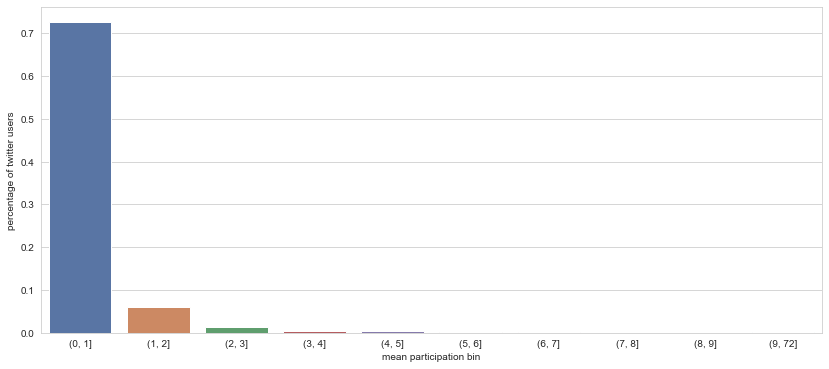

In [62]:
_, ax = plt.subplots(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.barplot(data=bin_participation, x = 'mean_par_bin', y= 'perc', palette="deep")
plt.ylabel('percentage of twitter users')
plt.xlabel('mean participation bin')

## Some Feature Extraction

In [ ]:
# example of one branch 
conv = data.loc[data.conversation_id == 'dq95b41']
conv

In [63]:
def count_op_involvment(subconv:pd.DataFrame, roots:pd.DataFrame) -> float:
    """
    counts the proportion of posts from the full conversation author in the subconversation
    """
    full_conversation_id = subconv.sample(1).full_conv_id.values[0]
    op = roots.loc[roots.full_conv_id == full_conversation_id].author.values[0]
    return len(subconv.loc[subconv.author == op]) / len(subconv)

In [ ]:
count_op_involvment(conv, roots)

In [64]:
# max branch depth 
def max_branch_depth(conv:pd.DataFrame) -> int:
    return conv.depth.max()

In [ ]:
max_branch_depth(conv)

In [65]:
# apply two features to all of the sub-conversations 
op_involvment = data.groupby('conversation_id').apply(lambda x: count_op_involvment(x, roots))

In [66]:
op_involvment.value_counts()

1.000000    510
0.500000    327
0.333333    319
0.250000    279
0.200000    270
           ... 
0.032609      1
0.158537      1
0.157895      1
0.121212      1
0.007194      1
Length: 182, dtype: int64

In [67]:
op_involvment_ = pd.DataFrame(op_involvment).rename({0:'op_involvment'}, axis=1)
op_involvment_

,op_involvment
conversation_id,
498235547685756928,0.250000
498248415223246848,0.043478
498248648699150336,0.015152
498250100079341568,0.250000
498251940997136384,0.125000
...,...
581387966125248512,0.200000
581394092648710144,0.090909
581411131547320321,0.100000


In [70]:
feature_set = data.merge(op_involvment_, how='left', on = 'conversation_id')

## Running MAXCUT

In [145]:
rumers_author_stance = []
for conversation in conversations:
    reply_interactions_parser = get_reply_interactions_parser()
    interaction_graph = reply_interactions_parser.parse(conversation)
    interaction_graph.get_core_interactions(inplace=True)
    interaction_graph.set_interaction_weights(lambda x: x['replies'])
    maxcut = MaxcutStanceClassifier()
    maxcut.set_input(interaction_graph.graph)
    op = conversation.root.author
    maxcut.classify_stance(op)
    for supporter in maxcut.supporters:
        row = {'conversation_id': conversation.id,
               'op': conversation.op,
               'author': supporter,
               'stance': 'supporter'}
        rumers_author_stance.append(row)
    for opposer in maxcut.complement:
        row = {'conversation_id': conversation.id,
               'op': conversation.op,
               'author': supporter,
               'stance': 'opposer'}
        rumers_author_stance.append(row)

In [146]:
len(rumers_author_stance)

1685

In [148]:
user_stance_rumors = pd.DataFrame(rumers_author_stance)
user_stance_rumors

,conversation_id,op,author,stance
0,553589970775343104,4970411,4970411,supporter
1,553589970775343104,4970411,21687995,supporter
2,553589970775343104,4970411,21687995,opposer
3,544512691948498944,428333,217628587,supporter
4,544512691948498944,428333,428333,supporter
...,...,...,...,...
1680,500382270340214784,1507338108,2336673134,supporter
1681,500382270340214784,1507338108,2336673134,opposer
1682,500378522398244865,230527949,60490731,supporter
1683,500378522398244865,230527949,60490731,opposer


## Extra for TSNE + PCA

In [ ]:
# data = pd.DataFrame.from_records(features, index="conv_id")
# print(data.head())

In [ ]:
data_ = data.loc[data.num_nodes > 10]

In [ ]:
data_.count()

In [ ]:
data_

In [ ]:
data_.describe()

In [ ]:
data_ = data_.fillna(0)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [ ]:
standardized_data = StandardScaler().fit_transform(data_)
print(standardized_data.shape)

In [ ]:
model = TSNE(n_components=2, random_state=0)

In [ ]:
tsne_data = model.fit_transform(standardized_data)

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.FacetGrid(tsne_df, height=9).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
m = DBSCAN()


In [ ]:
m.fit(standardized_data)

In [ ]:
clusters = m.labels_

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
# pca

from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)


In [ ]:
principalComponents = pca.fit_transform(standardized_data)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
sns.FacetGrid(principalDf, height=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()